In [ ]:
# This installs a helper library for reading files
!pip install -q kaggle

# These are the core libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes our charts show up in the notebook
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# This code will prompt you to upload a file from your computer
from google.colab import files
uploaded = files.upload()

# Load the uploaded CSV file into a Pandas DataFrame
# We'll use the 'pd.read_csv' function. The 'list(uploaded.keys())[0]' gets the name of the file you just uploaded.
df = pd.read_csv(list(uploaded.keys())[0])

# Print the first 5 rows to take a quick look
df.head()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Get the dimensions of the DataFrame (rows, columns)
print("Dataset shape:", df.shape)
print("\n")

# Get the names of the columns
print("Columns in the dataset:")
print(df.columns)
print("\n")

# Get basic info about the data types and non-null counts
print("Dataset info:")
df.info()

Dataset shape: (48895, 16)


Columns in the dataset:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude         

In [ ]:
# Calculate the total missing values and the percentage for each column
missing_data = df.isnull().sum().to_frame(name='Missing Values')
missing_data['Percentage'] = (missing_data['Missing Values'] / len(df)) * 100

# Sort the columns with the most missing values first
missing_data = missing_data.sort_values('Missing Values', ascending=False)

# Display only columns that have missing values
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723


In [ ]:
# Get descriptive statistics for numerical columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Clean the price column: Keep only listings where price is between $10 and $1000
# This removes extreme outliers and free listings that skew our analysis
df_clean = df[(df['price'] >= 10) & (df['price'] <= 1000)].copy()

# Check the new statistics for price
df_clean['price'].describe()

,price
count,48645.000000
mean,141.311789
std,116.731330
min,10.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,1000.000000


/tmp/ipython-input-804836178.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df_clean, estimator=np.mean, ci=None)


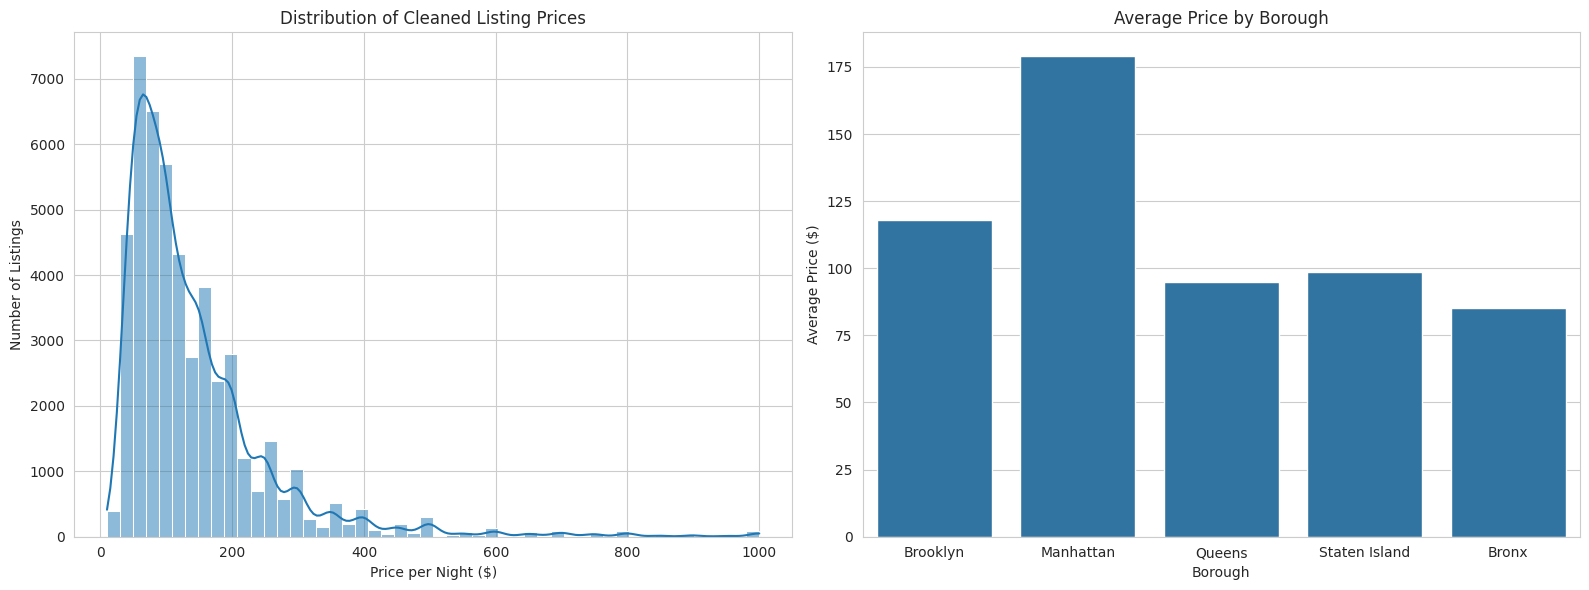

In [ ]:
# Set the style for our charts
sns.set_style("whitegrid")

# Create a figure with two charts side-by-side
plt.figure(figsize=(16, 6))

# Chart 1: Distribution of Prices
plt.subplot(1, 2, 1) # 1 row, 2 columns, position 1
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title('Distribution of Cleaned Listing Prices')
plt.xlabel('Price per Night ($)')
plt.ylabel('Number of Listings')

# Chart 2: Average Price by Neighborhood Group
plt.subplot(1, 2, 2) # 1 row, 2 columns, position 2
sns.barplot(x='neighbourhood_group', y='price', data=df_clean, estimator=np.mean, ci=None)
plt.title('Average Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price ($)')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
import csv

# Save the cleaned dataframe to a new TEXT file using TABS as the separator
df_clean.to_csv('airbnb_nyc_cleaned.txt', sep='\t', index=False, quoting=csv.QUOTE_ALL)

# Download the new file to your computer
files.download('airbnb_nyc_cleaned.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the cleaned dataframe to a JSON file
# 'orient='records' means the file will be a list of JSON objects, one per row
df_clean.to_json('airbnb_nyc_cleaned.json', orient='records', lines=True)

# Download the new JSON file to your computer
files.download('airbnb_nyc_cleaned.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>